# Homework 4

Name: Tomoki Kyotani

NUID: ‭002986248‬

In [1]:
# Install libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# 1. Create a custom logistic regression model using the following dataset (20 points)

The data is sourced from study of Abalone in Tasmania. It can be found at the UCI Machine Learning RepositoryLinks to an external site.. The dataset contains 4,141 observations and 10 variables.

    SEX = M (male), F (female), I (infant)

    LENGTH = Longest shell length in mm

    DIAM = Diameter perpendicular to length in mm

    HEIGHT = Height perpendicular to length and diameter in mm

    WHOLE = Whole weight of abalone in grams

    SHUCK = Shucked weight of meat in grams

    VISCERA = Viscera weight in grams

    SHELL = Shell weight after drying in grams

    RINGS = Age (+1.5 gives the age in years)

    CLASS = Age classification from 1 to 6 (A1= youngest,..., A6=oldest)

### Data Pre-processing

In [2]:
df = pd.read_csv('~/Downloads/abalone.data', header=None)
print(df.shape)
df.head()

(4177, 9)


,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Assign the column names

In [3]:
df.columns = ['SEX', 'LENGTH', 'DIAM', 'HEIGHT', 'WHOLE', 'SHUCK', 'VISCERA', 'SHELL', 'RINGS']

The SEX feature contains categorical values. Convert this feature to integers (0/1) using one hot encoding.

In [4]:
df.SEX.value_counts()

M    1528
I    1342
F    1307
Name: SEX, dtype: int64

In [5]:
df = pd.get_dummies(df)
df.head()

,LENGTH,DIAM,HEIGHT,WHOLE,SHUCK,VISCERA,SHELL,RINGS,SEX_F,SEX_I,SEX_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


RINGS + 1.5 gives the AGE values. I will create a CLASS feature (Age classification) based on the AGE values.

In [6]:
df['AGE'] = df.RINGS + 1.5
df['CLASS'] = pd.qcut(df['AGE'], q=6, labels=['A1', 'A2', 'A3', 'A4', 'A5', 'A6'])
df.head()

,LENGTH,DIAM,HEIGHT,WHOLE,SHUCK,VISCERA,SHELL,RINGS,SEX_F,SEX_I,SEX_M,AGE,CLASS
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1,16.5,A6
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1,8.5,A1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0,10.5,A3
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1,11.5,A4
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0,8.5,A1


The CLASS feature is derived from the AGE feature, and the AGE feature is derived from the RINGS feature. Therefore, since they are highly correlated, I will drop the AGE and RINGS features.

In [7]:
df.drop(['RINGS', 'AGE'], axis=1, inplace=True)
df.head()

,LENGTH,DIAM,HEIGHT,WHOLE,SHUCK,VISCERA,SHELL,SEX_F,SEX_I,SEX_M,CLASS
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1,A6
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1,A1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0,A3
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1,A4
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0,A1


### a) Split the dataset into training and test dataset 80:20

In [8]:
x = df.iloc[:, :10]
y = df.CLASS

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=11)
x_train.head()

,LENGTH,DIAM,HEIGHT,WHOLE,SHUCK,VISCERA,SHELL,SEX_F,SEX_I,SEX_M
4125,0.540,0.415,0.135,0.7090,0.3195,0.1740,0.185,0,1,0
317,0.450,0.350,0.100,0.3675,0.1465,0.1015,0.120,0,0,1
3200,0.505,0.405,0.160,0.6835,0.2710,0.1450,0.215,1,0,0
767,0.345,0.270,0.095,0.1970,0.0665,0.0500,0.070,0,0,1
4159,0.560,0.440,0.135,0.8025,0.3500,0.1615,0.259,1,0,0


### b) Custom logistic regression model should be in python class format (Should have init(), predict(), train() methods) and train the model using training dataset

Reference: IE7300 "Multiclass Logistic Regression.ipynb" file

In [9]:
class MultiClassLogisticRegression:    
    def __init__(self, epochs = 10000, threshold=1e-3):
        """
        Constructor for multiclass regression

        Args:
            epochs (int, optional): No of iteration Defaults to 10000.
            threshold (_type_, optional): Each iteration thresold. Defaults to 1e-3.
        """
        self.epochs = epochs
        self.threshold = threshold
    
    def train(self, X, y, batch_size=64, lr=0.001, rand_seed=4, verbose=False): 
        """
        Train the model

        Args:
            X (_type_): Features
            y (_type_): Labels
            batch_size (int, optional): Batch size per iterations. Defaults to 64.
            lr (float, optional): Learning rate. Defaults to 0.001.
            rand_seed (int, optional): _description_. Defaults to 4.
            verbose (bool, optional): _description_. Defaults to False.

        Returns:
            _type_: return the instance 
        """
        np.random.seed(rand_seed) 
        self.classes = np.unique(y)
        self.class_labels = {c:i for i,c in enumerate(self.classes)}
        X = self.add_bias(X)
        y = self.one_hot(y)
        self.loss = []
        self.weights = np.zeros(shape=(len(self.classes),X.shape[1]))
        self.train_data(X, y, batch_size, lr, verbose)
        return self
 
    def train_data(self, X, y, batch_size, lr, verbose):
        i = 0
        while (not self.epochs or i < self.epochs):
            self.loss.append(self.cross_entropy(y, self.predict_(X)))
            idx = np.random.choice(X.shape[0], batch_size)
            X_batch, y_batch = X[idx], y[idx]
            error = y_batch - self.predict_(X_batch)
            update = (lr * np.dot(error.T, X_batch))
            self.weights += update
            if np.abs(update).max() < self.threshold: 
                break
            if i % 1000 == 0 and verbose: 
                print(' Training Accuray at {} iterations is {}'.format(i, self.evaluate_(X, y)))
            i +=1
    
    # Predict probabilities
    def predict(self, X):
        return self.predict_(self.add_bias(X))
    
    def predict_(self, X):
        pre_vals = np.dot(X, self.weights.T).reshape(-1,len(self.classes))
        return self.softmax(pre_vals)
    
    def softmax(self, z):
        return np.exp(z) / np.sum(np.exp(z), axis=1).reshape(-1,1)

    # Return predicted classes based on the probabilities
    def predict_classes(self, X):
        self.probs_ = self.predict(X)
        return np.vectorize(lambda c: self.classes[c])(np.argmax(self.probs_, axis=1))
  
    def add_bias(self,X):
        return np.insert(X, 0, 1, axis=1)
  
    # def get_random_weights(self, row, col):
    #     return np.zeros(shape=(row,col))

    def one_hot(self, y):
        return np.eye(len(self.classes))[np.vectorize(lambda c: self.class_labels[c])(y).reshape(-1)]
    
    def score(self, X, y):
        return round(np.mean(self.predict_classes(X) == y),3)
    
    def evaluate_(self, X, y):
        return np.mean(np.argmax(self.predict_(X), axis=1) == np.argmax(y, axis=1))
    
    def cross_entropy(self, y, probs):
        return -1 * np.mean(y * np.log(probs))

Train the model using the training dataset

In [10]:
lg_model = MultiClassLogisticRegression()
lg_model.train(np.array(x_train), np.array(y_train), verbose=True)

 Training Accuray at 0 iterations is 0.29482190960790183
 Training Accuray at 1000 iterations is 0.40526788386710566
 Training Accuray at 2000 iterations is 0.41664172403472016
 Training Accuray at 3000 iterations is 0.42771625261897633
 Training Accuray at 4000 iterations is 0.4346004190362167
 Training Accuray at 5000 iterations is 0.4405866507033822
 Training Accuray at 6000 iterations is 0.4510625561209219
 Training Accuray at 7000 iterations is 0.4507632445375636
 Training Accuray at 8000 iterations is 0.4657288237054774
 Training Accuray at 9000 iterations is 0.4621370847051781


### c) Predict the age category using test dataset, and provide some insights

In [11]:
np.mean(lg_model.predict_classes(np.array(x_test)) == y_test)

0.4449760765550239

As shown above, the accuracy from the test dataset is only 0.445, and the performance of this model is not good. In order to improve the performance of the model, I looked at the statistics of the dataset and noticed that scaling might help in this case since the features are not necessarily in the same scale.

In [12]:
x.describe()

,LENGTH,DIAM,HEIGHT,WHOLE,SHUCK,VISCERA,SHELL,SEX_F,SEX_I,SEX_M
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,0.312904,0.321283,0.365813
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,0.463731,0.467025,0.481715
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,0.000000,0.000000,0.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,0.000000,0.000000,0.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,0.000000,0.000000,0.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,1.000000,1.000000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,1.000000,1.000000,1.000000


Scale the dataset and train the model again.

In [13]:
x = df.iloc[:, :10]
y = df.CLASS

x_columns = x.columns
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x))
x.columns = x_columns
x.head()

,LENGTH,DIAM,HEIGHT,WHOLE,SHUCK,VISCERA,SHELL,SEX_F,SEX_I,SEX_M
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,-0.674834,-0.688018,1.316677
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.674834,-0.688018,1.316677
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,1.481846,-0.688018,-0.759488
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,-0.674834,-0.688018,1.316677
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.674834,1.453451,-0.759488


Split the data into training and test (80:20).

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=12)

Train the model and predict using the test dataset.

In [15]:
lg_model = MultiClassLogisticRegression()
lg_model.train(np.array(x_train), np.array(y_train), verbose=True)

 Training Accuray at 0 iterations is 0.3873091888656091
 Training Accuray at 1000 iterations is 0.4806944028733912
 Training Accuray at 2000 iterations is 0.4917689314576474
 Training Accuray at 3000 iterations is 0.4932654893744388
 Training Accuray at 4000 iterations is 0.49536067045794674
 Training Accuray at 5000 iterations is 0.4944627357078719
 Training Accuray at 6000 iterations is 0.4971565399580964
 Training Accuray at 7000 iterations is 0.49865309787488776
 Training Accuray at 8000 iterations is 0.4983537862915295
 Training Accuray at 9000 iterations is 0.4968572283747381


In [16]:
y_pred = lg_model.predict_classes(np.array(x_test))
print("Test Accuracy - ", np.mean(y_pred == y_test))

Test Accuracy -  0.5311004784688995


As shown above, although the new accuracy 0.53 is still low, I can see that the model performance slightly improved via scaling.

### d) Show the predicted output, and loss function output plots, and explain the outcome

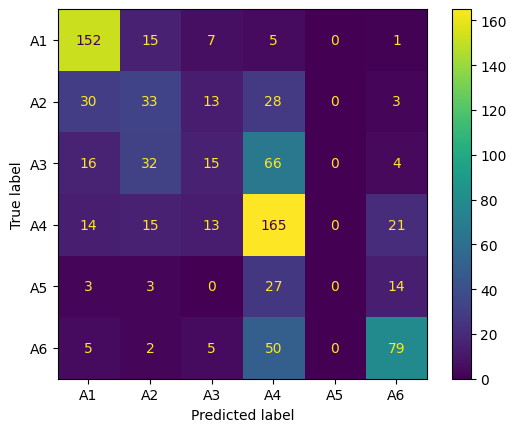

In [17]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred) 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6'])

cm_display.plot()
plt.show()

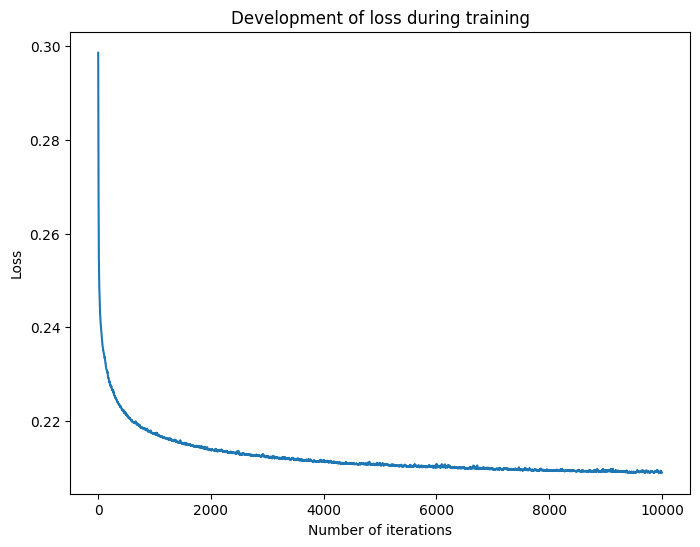

In [18]:
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(len(lg_model.loss)), lg_model.loss)
plt.title("Development of loss during training")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

Looking at the plots above, we can see that this model predicts the classes 'A1' and 'A4' the best. 

In addition, from the loss function output plot, it can be seen that the more interations we have, the better the loss score is. However, the large number of iterations requires longer computation time and more resources, so we need to be cautious when choosing the number of interations. 

### e) Calculate the Confusion matrix and explain the model accuracy

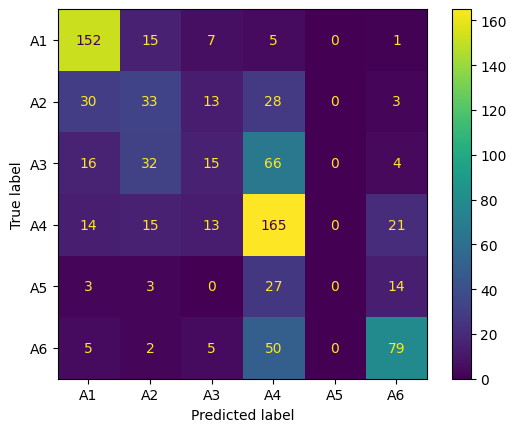

In [19]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred) 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6'])

cm_display.plot()
plt.show()

In [20]:
print(metrics.classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

          A1       0.69      0.84      0.76       180
          A2       0.33      0.31      0.32       107
          A3       0.28      0.11      0.16       133
          A4       0.48      0.72      0.58       228
          A5       0.00      0.00      0.00        47
          A6       0.65      0.56      0.60       141

    accuracy                           0.53       836
   macro avg       0.41      0.42      0.40       836
weighted avg       0.48      0.53      0.49       836



Looking at the result above, although the overall accuracy is low (0.53), we can still see that this model predicts the class "A1" and "A4" better than other classes. For these "A1" and "A4" classes, their recall is the highest among the other matrics of each class and is 0.84 and 0.72, respectively. This indicates that this model is good at accurately predicting the "A1" and "A4" classes among all actual "A1" and "A4" classes.

# 2. Perform Principal component Analysis for the same dataset (15 points)

Reference: IE7300 "PCA.ipynb" file

In [21]:
class PCA:
    """
     Implement the PCA from scratch
    """
    def __init__(self, n_components):
        """
         Constructor for PCA class

        Args:
            n_components (_type_): _description_
        """
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        """
        Fit the PCA model

        Args:
            X (_type_): _description_
        """
        # Mean centering
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        # covariance, function needs samples as columns
        cov = np.cov(X.T)

        # eigenvalues, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)

        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvectors
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        self.eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        # store first n eigenvectors
        self.components = eigenvectors[0 : self.n_components]

    def transform(self, X):
        # project data
        X = X - self.mean
        return np.dot(X, self.components.T)

### a) Show top 3 of the PCA component output

In [22]:
df.head()

,LENGTH,DIAM,HEIGHT,WHOLE,SHUCK,VISCERA,SHELL,SEX_F,SEX_I,SEX_M,CLASS
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1,A6
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1,A1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0,A3
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1,A4
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0,A1


In [23]:
x = df.iloc[:, :10]
y = df['CLASS']

pca = PCA(3)
pca.fit(x)
pca_projected = pca.transform(x)
pca_projected = pd.DataFrame(pca_projected, columns = ['PC1', 'PC2', 'PC3'])

print("Shape of X:", x.shape)
print("Shape of transformed X:", pca_projected.shape)
print("pca_projected: \n", pca_projected.head())

pc1 = pca_projected.iloc[:, 0]
pc2 = pca_projected.iloc[:, 1]
pc3 = pca_projected.iloc[:, 2]

Shape of X: (4177, 10)
Shape of transformed X: (4177, 3)
pca_projected: 
         PC1       PC2       PC3
0  0.026193  0.710585  0.486584
1 -0.227569  0.737814  0.731180
2  0.126753 -0.713963  0.465479
3  0.026789  0.710420  0.486378
4 -1.124623 -0.010408 -0.066754


The first 5 rows of the calculated top 3 Principal Components are shown above.

### b) Plot the PCA 1, PCA 2 , and PCA2 components

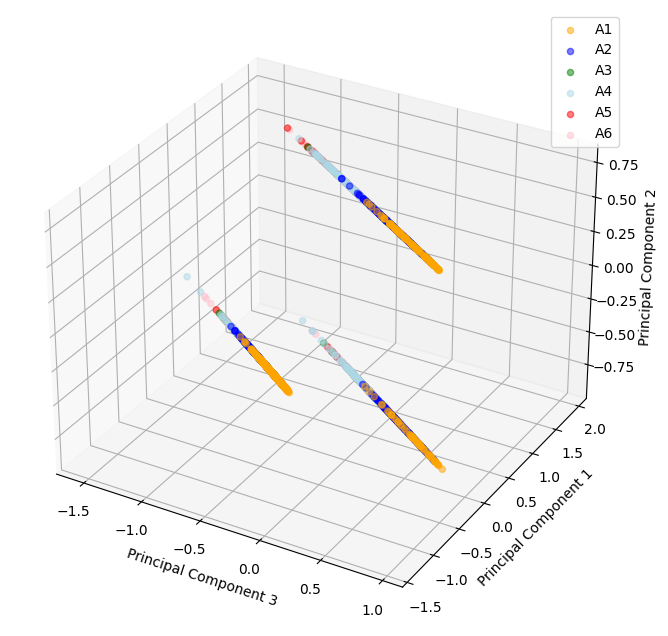

In [24]:
fig = plt.figure(figsize =(8, 8))
ax = fig.add_subplot(projection='3d')

colors = {'A1': 'orange', 'A2': 'blue', 'A3':'green', 'A4':'lightblue', 'A5':'red', 'A6':'pink'}

for class_key in colors:

    ax.scatter(pc3[y == class_key], pc1[y == class_key], pc2[y == class_key], c=colors[class_key], label=class_key, alpha = 0.5)

ax.set_xlabel("Principal Component 3")
ax.set_ylabel("Principal Component 1")
ax.set_zlabel("Principal Component 2")
ax.legend()

plt.show()

As the plot above shows, we can see that the class 'A1' tend to have a lower value of PC2 and a higher value of PC3. On the other hand, the class 'A4' tend to have a higher value of PC2 and a lower value of PC3.

### c) Could you use PCA component for logistic regression? 

Yes, we can use PCA for logistic regression. PCA is helpful when there are many predictors and can reduce the number of predictors. By doing so, we can reduce the computation time as we can use less predictors.